# Notebook

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and Prep

In [4]:
#Read Data into a DataFrame
df = pd.read_csv('data/bank-additional-full.csv', delimiter= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Standardise Column Names
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
#Drop Columns
df = df.drop(columns=['emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'])

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#View Missing Variables
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
#View Column Contents
for col in df.columns:
    print(col)
    print(df[col].dtypes)
    print(df[col].unique())
    print(f' Unique Values: {df[col].nunique()}')
    print()

age
int64
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
 Unique Values: 78

job
object
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
 Unique Values: 12

marital
object
['married' 'single' 'divorced' 'unknown']
 Unique Values: 4

education
object
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
 Unique Values: 8

default
object
['no' 'unknown' 'yes']
 Unique Values: 3

housing
object
['no' 'yes' 'unknown']
 Unique Values: 3

loan
object
['no' 'yes' 'unknown']
 Unique Values: 3

contact
object
['telephone' 'cellular']
 Unique Values: 2

month
object
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
 Unique Values: 10

d

In [10]:
#Map Education to 4 Values

education_mapping = {
    'illiterate': 'primary',
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'basic.9y': 'primary',
    'high.school': 'secondary',
    'professional.course': 'secondary',
    'university.degree': 'tertiary',
    'unknown': 'unknown'
}

df['education'] = df['education'].map(education_mapping)

## EDA

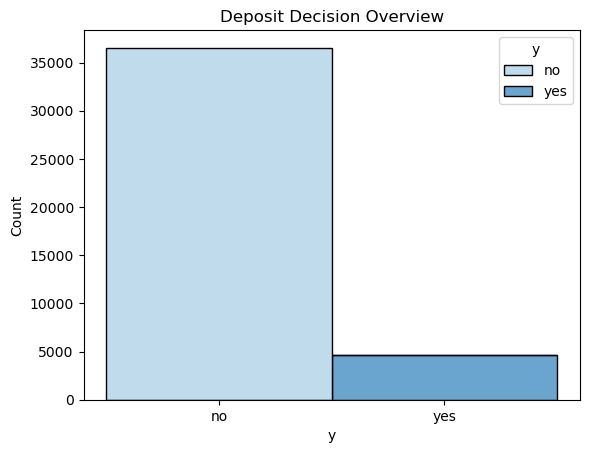

In [12]:
fig=sns.histplot(data=df, x="y", hue="y", palette='Blues' ,multiple="stack")
plt.title('Deposit Decision Overview')
plt.show()

In [13]:
#Convert y to Numerical
print(df.y.value_counts(normalize=True))
df.y = (df.y=='yes').astype('int')
df.y.mean()

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


0.11265417111780131

In [14]:
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'default', 'housing', 
               'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [15]:
#list of numeric features correlation with Decision
df.corr(numeric_only=True)['y'].abs().sort_values(ascending=False)

y           1.000000
duration    0.405274
pdays       0.324914
previous    0.230181
campaign    0.066357
age         0.030399
Name: y, dtype: float64

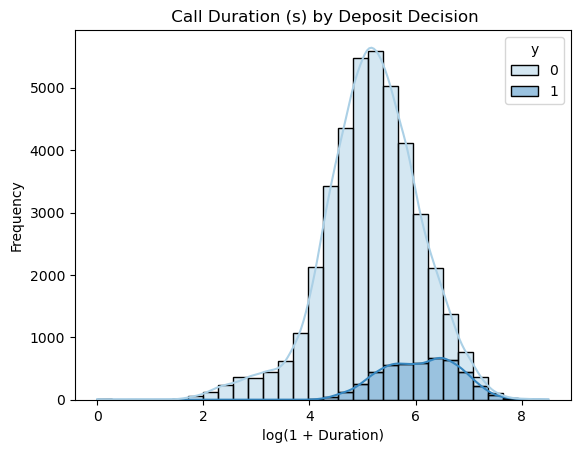

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform duration by Deposit Decision as Long Tail Distribution
df_log = df.copy()
df_log['log_duration'] = np.log1p(df['duration'])
palette = sns.color_palette("Blues", n_colors=df['y'].nunique())

sns.histplot(
    data=df_log,
    x='log_duration',
    hue='y',
    kde=True,
    bins=30,
    palette=palette,
    multiple='stack'
)
plt.title(' Call Duration (s) by Deposit Decision')
plt.xlabel('log(1 + Duration)')
plt.ylabel('Frequency')
plt.show()


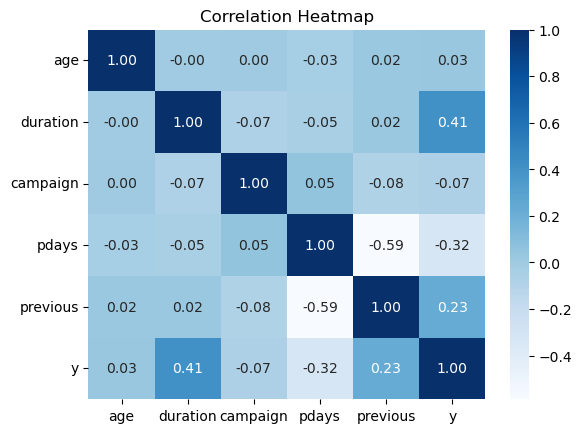

In [17]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap = 'Blues' ,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='pdays', ylabel='Count'>

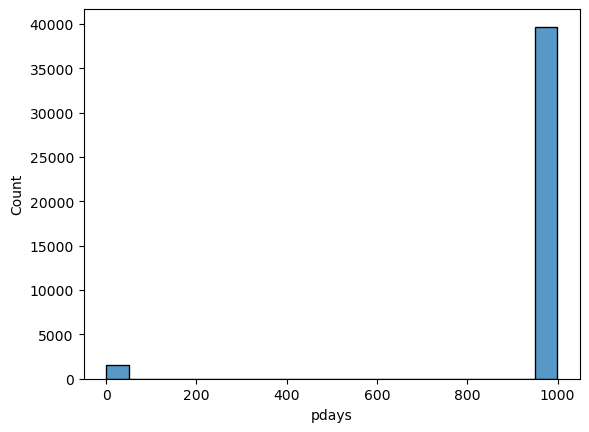

In [18]:
#Distribution of pdays variable
sns.histplot(df.pdays, bins=20)

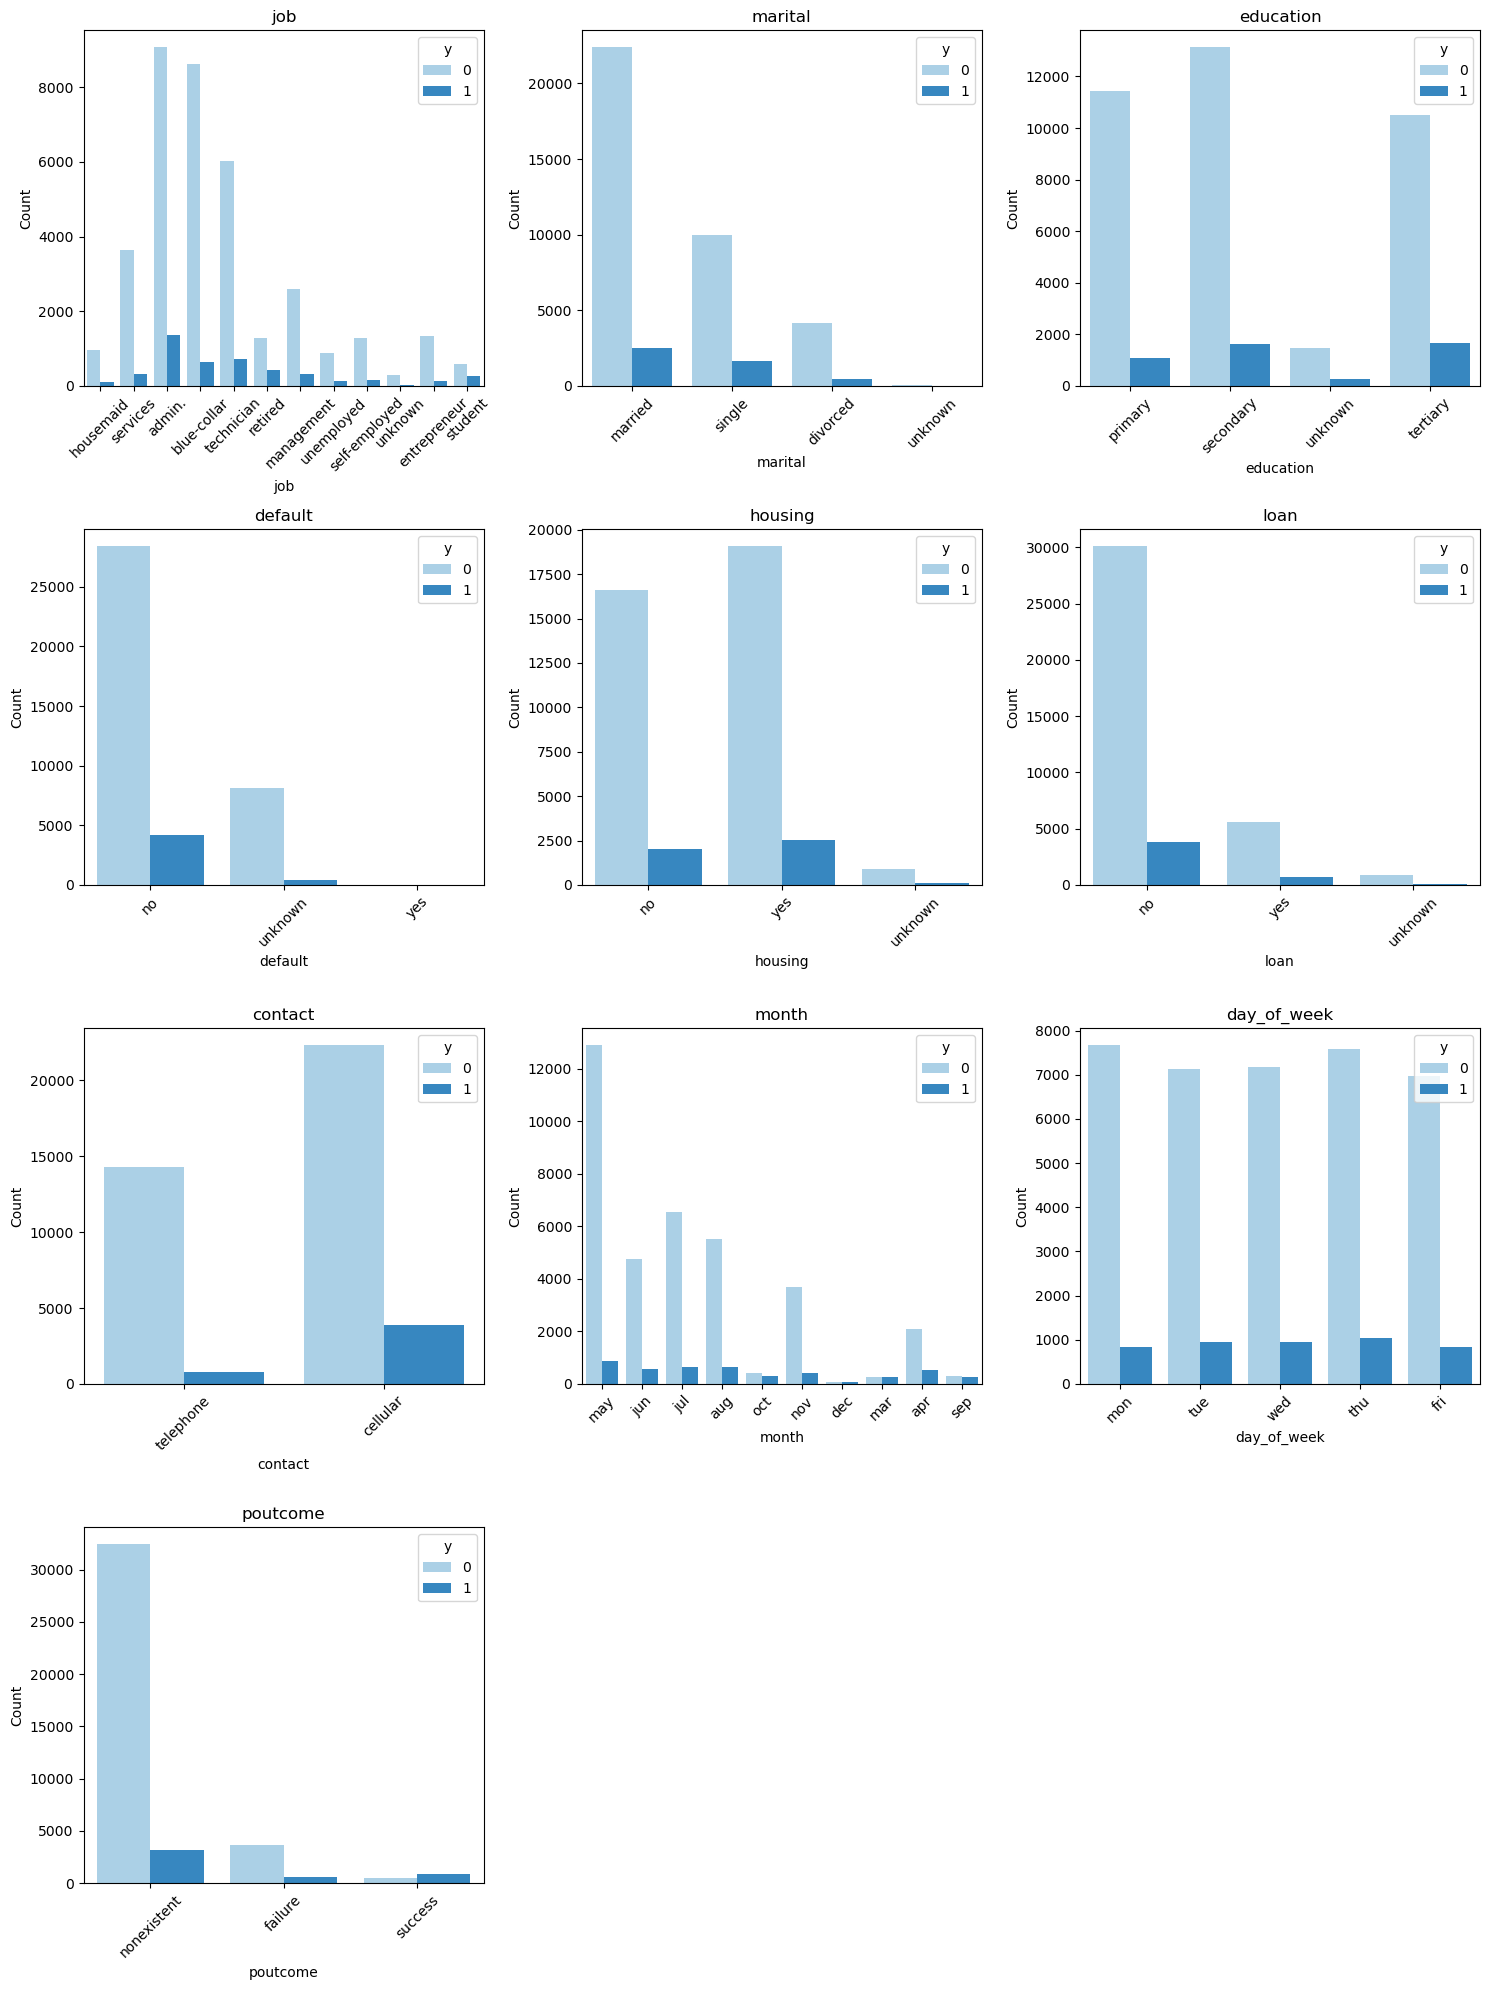

In [19]:
n_cols = 3
n_rows = (len(categorical) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, c in enumerate(categorical):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=c, hue='y', palette='Blues', saturation=10)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

Variables to drop: 
- **duration** due to *data leakage* - call duration is only known after the call ends, but we need to predict subscription likelihood before making the call.
- **pdays** due to *data quality issues* - the variable contains 999 for clients never previously contacted.

In [21]:
df = df.drop(columns = ['pdays', 'duration'])
numerical = ['age', 'campaign', 'previous']

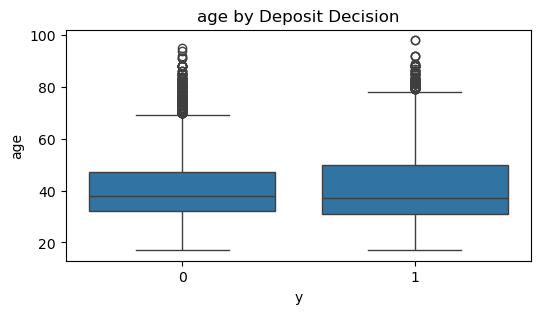

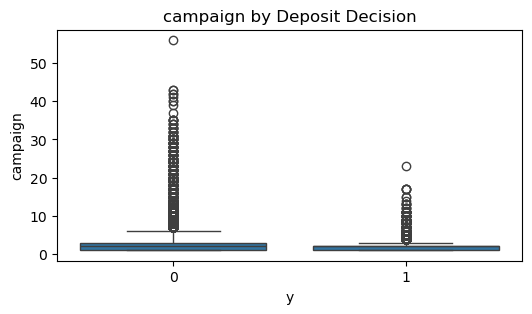

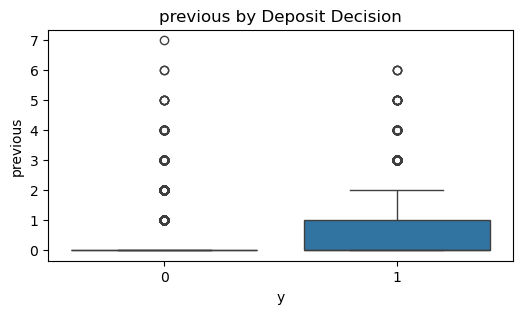

In [22]:
for col in numerical:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} by Deposit Decision')
    plt.show()

### EDA Summary and Key Findings

- **Target variable (`y`) is highly imbalanced**: Only about 11% of customers subscribed to a term deposit. This will require careful handling during model evaluation (e.g. ROC-AUC, stratified sampling).
- **Categorical features such as `job`, `marital`, `poutcome`, and `education` show clear differences in deposit subscription rates**. These variables are likely to be important predictors.
- **Call duration and pdays were dropped**:
    - `duration` leaks information about the outcome (data leakage) and is not available before prediction.
    - `pdays` is mostly set to 999, indicating clients never previously contacted—making it uninformative and potentially misleading.
- **Numerical features (`age`, `campaign`, `previous`)**: Boxplots show some differences in distribution by target, especially for `campaign` and `previous`.
- **‘Unknown’ values** are present in several categorical columns (e.g. `education`, `job`). For now, these will be treated as separate categories; further exploration could include grouping or imputing them if needed.
- **No major issues with missing (NaN) values** detected; missingness is handled as `'unknown'` strings.

## Split Data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, classification_report

In [26]:
def split_data(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=True, stratify=df['y'])
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, shuffle=True, stratify=df_full_train['y'])

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.y.values
    y_val = df_val.y.values
    y_test = df_test.y.values
    
    del df_train['y']
    del df_val['y']
    del df_test['y']

    return df_full_train, df_train, df_val, df_test, y_train, y_val, y_test

In [27]:
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(df)

In [28]:
len(df_full_train), len(df_train), len(df_val), len(df_test)

(32950, 24712, 8238, 8238)

In [29]:
def transform_data(df): 
    df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(df)
    dicts_train = df_train.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')
    dicts_test = df_test.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)
    X_test = dv.transform(dicts_test)

    return dicts_train, dicts_val, dicts_test, X_train, X_val, X_test

In [30]:
dicts_train, dicts_val, dicts_test, X_train, X_val, X_test = transform_data(df)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.7601692591631681

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
thresholds = np.linspace(0,1,101)

results = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precision = precision_score(y_val, y_pred_bin)
    recall = recall_score(y_val, y_pred_bin)
    f1 = f1_score(y_val, y_pred_bin)
    results.append((t, precision, recall, f1))

df_scores = pd.DataFrame(results, columns = ['threshold', 'precision', 'recall', 'f1_score'])

best_row = df_scores.iloc[df_scores['f1_score'].idxmax()]

print('Threshold with Highest F1 Score:', best_row[0])
print('Precision Score:', best_row[1])
print('Recall Score:', best_row[2])
print('F1 Score:', best_row[3])

Threshold with Highest F1 Score: 0.19
Precision Score: 0.4513574660633484
Recall Score: 0.42995689655172414
F1 Score: 0.44039735099337746


In [35]:
def train(df_train, y_train):
    dict_train = df_train.to_dict(orient = 'records')

    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(dict_train)

    model = LogisticRegression(solver='lbfgs')
    
    model.fit(X_train, y_train)

    return dv, model


def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [36]:
from sklearn.model_selection import KFold
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['y'].values
    y_val = df_val['y'].values

    df_train = df_train.drop(columns= ['y'])
    df_val = df_val.drop(columns= ['y'])

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f: +- %.3f' % (np.mean(scores), np.std(scores)))

0.759: +- 0.008


In [37]:
#Final Model
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(df)
dicts_train, dicts_val, dicts_test, X_train, X_val, X_test = transform_data(df)

y_train = df_full_train['y'].values
df_full_train = df_full_train.drop(columns = ['y'])

dv, model = train(df_full_train, y_train)

y_pred = predict(df_test, dv, model)

deposit_decision = (y_pred >= 0.19).astype(int)

auc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, deposit_decision))

print(f'auc of the final model = {auc}')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7310
           1       0.44      0.45      0.44       928

    accuracy                           0.87      8238
   macro avg       0.68      0.69      0.68      8238
weighted avg       0.87      0.87      0.87      8238

auc of the final model = 0.7652327350346715


In [38]:
from sklearn.metrics import accuracy_score

metrics_lr = {
    'Model': 'Logistic Regression',
    'ROC AUC': roc_auc_score(y_test, y_pred),
    'F1': f1_score(y_test, deposit_decision),
    'Precision': precision_score(y_test, deposit_decision),
    'Recall': recall_score(y_test, deposit_decision),
    'Accuracy': accuracy_score(y_test, deposit_decision)
}

print(metrics_lr)


{'Model': 'Logistic Regression', 'ROC AUC': 0.7652327350346715, 'F1': 0.44148936170212766, 'Precision': 0.43592436974789917, 'Recall': 0.44719827586206895, 'Accuracy': 0.8725418790968682}


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(df)
dicts_train, dicts_val, dicts_test, X_train, X_val, X_test = transform_data(df)

In [43]:
scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        rf = RandomForestClassifier(max_depth=d, 
                                    min_samples_leaf=s, 
                                    n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [44]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'],
                values=['auc'])

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

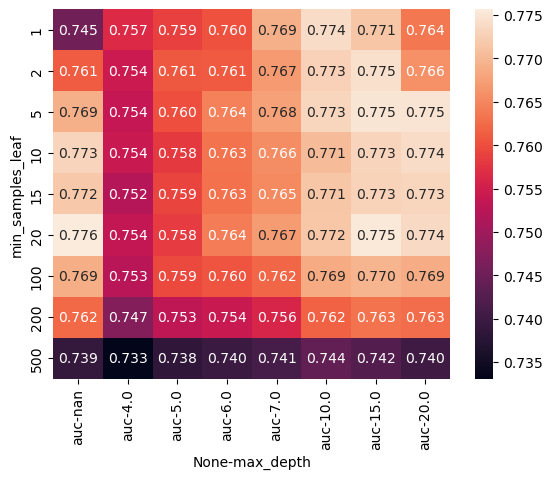

In [45]:
sns.heatmap(df_scores_pivot, annot=True, fmt = '.3f')

In [46]:
max_depth = 15
min_samples_leaf = 15

In [47]:
thresholds = np.linspace(0,1,101)

rf = RandomForestClassifier(max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            n_jobs = -1,
                            random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

results = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precision = precision_score(y_val, y_pred_bin)
    recall = recall_score(y_val, y_pred_bin)
    f1 = f1_score(y_val, y_pred_bin)
    results.append((t, precision, recall, f1))

df_scores = pd.DataFrame(results, columns = ['threshold', 'precision', 'recall', 'f1_score'])

best_row = df_scores.iloc[df_scores['f1_score'].idxmax()]

print('Threshold with Highest F1 Score:', best_row[0])
print('Precision Score:', best_row[1])
print('Recall Score:', best_row[2])
print('F1 Score:', best_row[3])

Threshold with Highest F1 Score: 0.19
Precision Score: 0.44542772861356933
Recall Score: 0.48814655172413796
F1 Score: 0.46580976863753215


In [48]:
y_pred = rf.predict_proba(X_test)[:, 1]

deposit_decision = (y_pred >= 0.19).astype('int')

In [49]:
print(roc_auc_score(y_test, y_pred))

0.773315073824237


In [50]:
metrics_rf = {
    'Model': 'Random Forest',
    'ROC AUC': roc_auc_score(y_test, y_pred),
    'F1': f1_score(y_test, deposit_decision),
    'Precision': precision_score(y_test, deposit_decision),
    'Recall': recall_score(y_test, deposit_decision),
    'Accuracy': accuracy_score(y_test, deposit_decision)
}

print(metrics_rf)

{'Model': 'Random Forest', 'ROC AUC': 0.773315073824237, 'F1': 0.47715736040609136, 'Precision': 0.4510556621880998, 'Recall': 0.5064655172413793, 'Accuracy': 0.8749696528283564}


#### Random Forest Model Approach and Summary

**Data Splitting**: The dataset was split into training, validation, and test sets, with stratification to preserve class balance and avoid data leakage.

**Feature Engineering**: Categorical and numerical features were prepared using DictVectorizer, suitable for scikit-learn models and mixed-type data.

**Model Selection**: Random Forest was chosen as a robust baseline for binary classification, as it handles both categorical and numerical features well and is relatively insensitive to feature scaling.

**Hyperparameter Tuning**: I performed a grid search over max_depth and min_samples_leaf, visualised results with a heatmap, and then tuned n_estimators. Given that multiple parameter combinations produced similar results, I manually selected a representative set of hyperparameters for clarity and reproducibility.

**Evaluation**: The model was evaluated using ROC AUC, F1, Precision, Recall, and Accuracy on the held-out test set. All model decisions were made without referencing the test data.

**Reproducibility**: Key choices and manual selections are documented here and will be explained further in the project README.

### XGBoost

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')  

df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(df)
dicts_train, dicts_val, dicts_test, X_train, X_val, X_test = transform_data(df)

In [96]:
y_full_train = df_full_train['y'].values
dicts_full_train = df_full_train.drop(columns=['y']).to_dict(orient='records')

dv_full = DictVectorizer(sparse=False)
X_full_train = dv_full.fit_transform(dicts_full_train)

# 3) Build test features matrix with the same vectoriser
dicts_test = df_test.to_dict(orient='records')
X_test_full = dv_full.transform(dicts_test)

In [100]:
#Defining grid of parameters I want to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],    # eta
    'max_depth':      [3, 5, 7, 10],
    'min_child_weight':[1, 3, 5, 10]
}

#Initialising the classifier
xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=(len(y_full_train) - sum(y_full_train)) / sum(y_full_train),  # handle imbalance
    random_state=1
)

In [102]:
#GridSearch to optimise F1
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid.fit(X_full_train, y_full_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5, 10]},
             scoring='f1', verbose=1)

In [106]:
print("Best params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

Best params: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10}
Best CV F1: 0.4376486736589419


In [108]:
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0,1,101)

results = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precision = precision_score(y_val, y_pred_bin, zero_division=0)
    recall = recall_score(y_val, y_pred_bin, zero_division=0)
    f1 = f1_score(y_val, y_pred_bin, zero_division=0)
    results.append((t, precision, recall, f1))

df_scores = pd.DataFrame(results, columns = ['threshold', 'precision', 'recall', 'f1_score'])

best_row = df_scores.iloc[df_scores['f1_score'].idxmax()]

print('Threshold with Highest F1 Score:', best_row[0])
print('Precision Score:', best_row[1])
print('Recall Score:', best_row[2])
print('F1 Score:', best_row[3])

Threshold with Highest F1 Score: 0.6
Precision Score: 0.46161417322834647
Recall Score: 0.5053879310344828
F1 Score: 0.4825102880658436


In [112]:
y_pred = best_xgb.predict_proba(X_test)[:, 1]

deposit_decision = (probs_test >= 0.6).astype(int)  # reuse your tuned threshold

print(roc_auc_score(y_test, y_pred))

0.7778023137883863


In [114]:
metrics_xgb = {
    'Model': 'XGBoost',
    'ROC AUC': roc_auc_score(y_test, y_pred),
    'F1': f1_score(y_test, deposit_decision),
    'Precision': precision_score(y_test, deposit_decision),
    'Recall': recall_score(y_test, deposit_decision),
    'Accuracy': accuracy_score(y_test, deposit_decision)
}

print(metrics_xgb)

{'Model': 'XGBoost', 'ROC AUC': 0.7778023137883863, 'F1': 0.4743202416918429, 'Precision': 0.44517958412098296, 'Recall': 0.5075431034482759, 'Accuracy': 0.8732702112163147}


## Comparison of Models

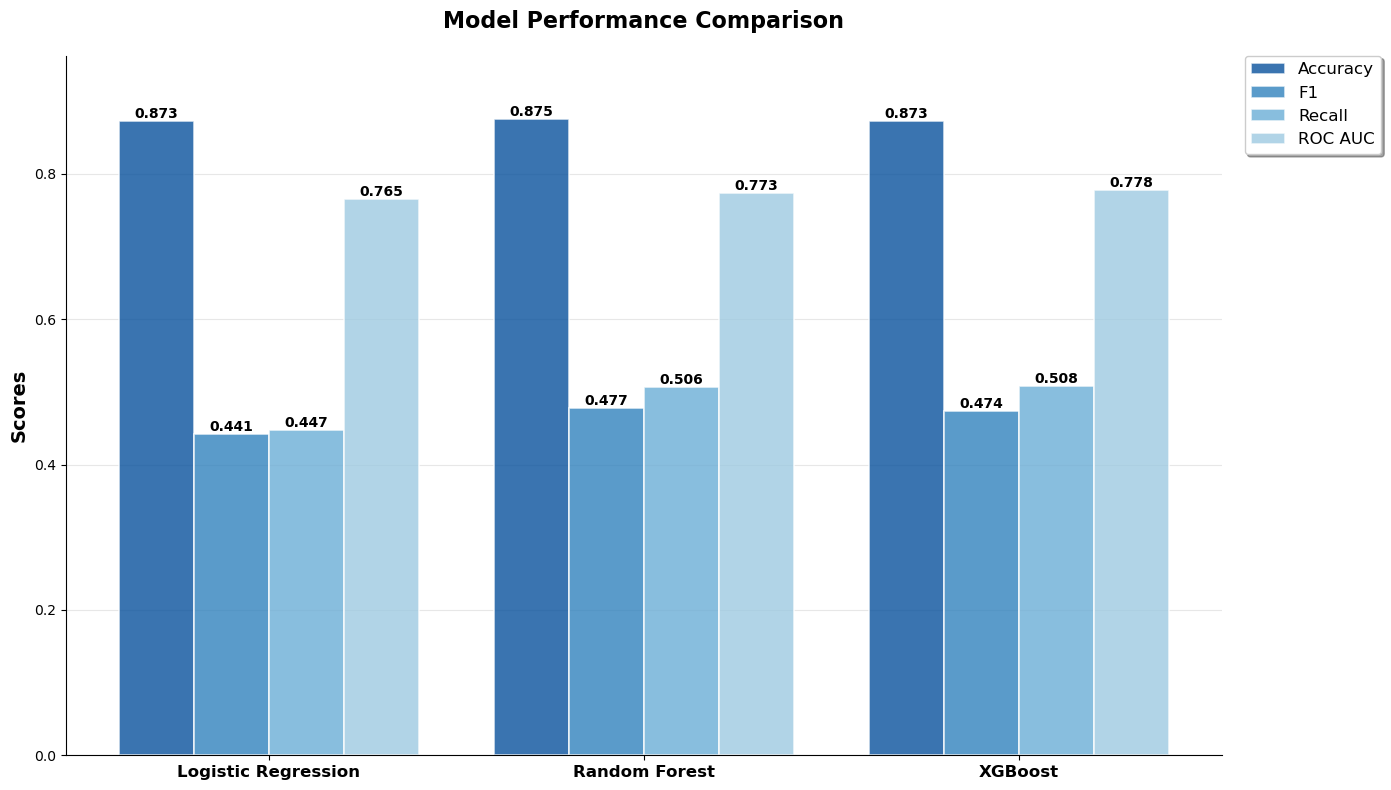

In [128]:
import matplotlib.pyplot as plt
import numpy as np

desired = ['Accuracy', 'F1', 'Recall', 'ROC AUC']
all_metrics = {
    'Logistic Regression': metrics_lr,
    'Random Forest': metrics_rf,
    'XGBoost': metrics_xgb
}

models = list(all_metrics.keys())
metrics = [m for m in desired if m in metrics_lr]
values = np.array([
    [all_metrics[model][met] for met in metrics]
    for model in models
])

x = np.arange(len(models))
width = 0.2

# Create larger figure
fig, ax = plt.subplots(figsize=(14, 8))

# Blues color palette for better visual distinction
colors = ['#08519c', '#3182bd', '#6baed6', '#9ecae1']

bars = []
for i, met in enumerate(metrics):
    offset = (i - (len(metrics)-1)/2) * width
    bar = ax.bar(x + offset, values[:, i], width, 
                label=met, color=colors[i], alpha=0.8, 
                edgecolor='white', linewidth=1.2)
    bars.append(bar)

# Enhanced styling
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)

# Improved grid and styling
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels on bars with better formatting
for bar_group in bars:
    ax.bar_label(bar_group, fmt='%.3f', fontsize=10, fontweight='bold')

# Enhanced legend
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), 
          borderaxespad=0, fontsize=12, frameon=True, 
          fancybox=True, shadow=True)

# Set y-axis limits for better visibility
ax.set_ylim(0, max(values.flatten()) * 1.1)

# Adjust layout
plt.tight_layout()
plt.show()